KNN, N=15, Randomized PCA, n_componenets=50

In [ ]:
import json

import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import StratifiedKFold

In [3]:
# Paths to the base directories/files of the dataset
base_dir = Path('/Users/homayraalam/Downloads/cassava-leaf-disease-classification')
train_df = pd.read_csv(f'{base_dir}/train.csv')

In [ ]:
# Read the JSON file and write its contents to a variable
with open(f'{base_dir}/label_num_to_disease_map.json') as f:
    class_names = json.loads(f.read())
f.close()

Data Preprocessing

In [5]:
# Let's show the names of the classes 
class_names

{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [6]:
# Let's check our DataFrame with training data
train_df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [7]:
# Add a new column with appropriate class names for labels
train_df['label_name'] = train_df['label'].apply(lambda x: class_names[str(x)])

In [8]:
# Check the result
train_df.head()

,image_id,label,label_name
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)


In [9]:
# Let's use StratifiedKFold to split the dataset into 4 parts
sk = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

for fold, (train, val) in enumerate(sk.split(train_df, train_df.label)):
    train_df.loc[val, 'fold'] = fold

In [10]:
# Converting from float type to int
train_df.fold = train_df.fold.astype(int)

In [11]:
# Check the result
train_df

,image_id,label,label_name,fold
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB),2
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD),2
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD),1
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD),1
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD),2
...,...,...,...,...
21392,999068805.jpg,3,Cassava Mosaic Disease (CMD),0
21393,999329392.jpg,3,Cassava Mosaic Disease (CMD),0
21394,999474432.jpg,1,Cassava Brown Streak Disease (CBSD),1
21395,999616605.jpg,4,Healthy,1


In [12]:
# Save updated dataset
train_df.to_csv('/Users/homayraalam/Downloads/cassava-leaf-disease-classification/train_splitted.csv', index=False)

In [13]:
import os
train_dir = '/Users/homayraalam/Downloads/cassava-leaf-disease-classification/train_images'
test_dir = '/Users/homayraalam/Downloads/cassava-leaf-disease-classification/test_images'
train = os.listdir(train_dir)

test= os.listdir(test_dir)
print(len(train),len(test),len(train)+len(test))

21397 1 21398


/Users/homayraalam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


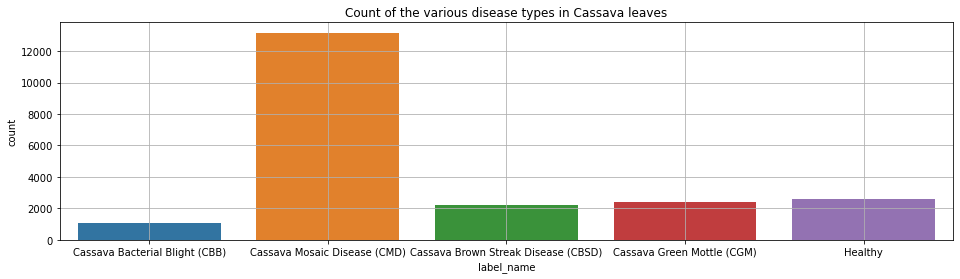

In [14]:
'''check the count of the various disease types'''

#visualization imports
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(16,4))
sns.countplot(train_df['label_name'])
plt.title('Count of the various disease types in Cassava leaves')

plt.grid()
plt.show()

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image

from sklearn import model_selection
from sklearn import metrics





In [17]:
#reset the index and than drop the index
df_train = train_df.reset_index(drop=True)
#df_valid = df_valid.reset_index(drop=True)
df_train.shape

(21397, 4)

In [18]:
df_train.head

<bound method NDFrame.head of              image_id  label                           label_name  fold
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)     2
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)     2
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)     1
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)     1
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)     2
...               ...    ...                                  ...   ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)     0
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)     0
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)     1
21395   999616605.jpg      4                              Healthy     1
21396   999998473.jpg      4                              Healthy     3

[21397 rows x 4 columns]>

In [19]:
#join image name with path to make a list of training images

train_images = [os.path.join(train_dir,x) for x in df_train.image_id.values]
#train_images[1]
train_images_01=train_images[:5000]

In [20]:
type(train_images)

list

In [28]:
X=[]
WIDTH = 128
HEIGHT = 128
import cv2
for img in train_images_01:

    # Read and resize image
    full_size_image = cv2.imread(img)
    
    image_norm = cv2.normalize(full_size_image ,0,255,norm_type=cv2.NORM_MINMAX)
    X.append(cv2.resize(image_norm, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
    

    
    

In [29]:
X_T=np.array(X)
X_T.shape


(10000, 300, 300, 3)

In [30]:
d1, d2, d3, d4 = X_T.shape

In [31]:
x_data_reshaped = X_T.reshape((d1, d2*d3,d4))

Randomized PCA

In [ ]:
nsamples, nx, ny=x_data_reshaped.shape
d2_train_dataset = x_data_reshaped.reshape((nsamples,nx*ny))

from sklearn.decomposition import PCA as RandomizedPCA
pca=RandomizedPCA(n_components=50, svd_solver='randomized', whiten=True)

#pca = RandomizedPCA(50)
pca_values=pca.fit(d2_train_dataset)



In [ ]:
plt.plot(np.cumsum(pca_values.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [35]:
pca_values

PCA(n_components=50)

In [53]:
z =pca_values[:,49]

In [57]:
train_targets = df_train.label.values
#valid_targets = df_valid.label.values

In [58]:
len(train_targets)

21397

In [ ]:
pip install opencv-python

In [ ]:
! pip install imutils

In [59]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np


Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(
                                rotation_range=360,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                brightness_range=[0.1,0.9],
                                shear_range=25,
                                zoom_range=0.3,
                                channel_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1/255,
                                validation_split=0.15
                               )
                                 

Model Train

In [66]:
lables = train_targets
lables = np.array(lables)

dataset_size = z.shape[0]
data = z.reshape(dataset_size,-1)

#print(data.shape)
#print(lables.shape)
#print(dataset_size)
#print(lables)

(trainX, testX, trainY, testY ) = model_selection.train_test_split(data, lables, test_size= 0.25, random_state=42)

model = KNeighborsClassifier(n_neighbors=15)
model.fit(trainX, trainY)

#Predict the response for test dataset
y_pred = model.predict(testX)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Accuracy: 0.44560747663551403
